In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds-prices/Diamonds Prices2022.csv


# Decision Tree Regression

In [2]:
df=pd.read_csv("/kaggle/input/diamonds-prices/Diamonds Prices2022.csv")
df.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [3]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [4]:
df.shape

(53943, 10)

In [5]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [6]:
df["price"].agg(["min","max","mean","median"])

min         326.000000
max       18823.000000
mean       3932.734294
median     2401.000000
Name: price, dtype: float64

In [7]:
x=df.select_dtypes("object")
x

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53938,Premium,H,SI2
53939,Ideal,D,SI2
53940,Premium,E,SI1
53941,Premium,F,SI1


In [8]:
x.apply(lambda x:x.unique())

cut         [Ideal, Premium, Good, Very Good, Fair]
color                         [E, I, J, H, F, G, D]
clarity    [SI2, SI1, VS1, VS2, VVS2, VVS1, I1, IF]
dtype: object

In [9]:
#label encoding in cut
df["cut"]=df["cut"].replace({"Ideal":3,"Premium":4,"Good":1,"Very Good":2,"Fair":0})

In [10]:
df["cut"].unique()

array([3, 4, 1, 2, 0])

In [11]:
df_final=pd.get_dummies(df,drop_first=True)
df_final.head(2)

,carat,cut,depth,table,price,x,y,z,color_E,color_F,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,3,61.5,55.0,326,3.95,3.98,2.43,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,4,59.8,61.0,326,3.89,3.84,2.31,1,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
x=df_final.drop(columns="price")
y=df_final["price"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.10,random_state=1)

In [15]:
x_train.columns

Index(['carat', 'cut', 'depth', 'table', 'x', 'y', 'z', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [16]:
x_train.shape

(48548, 20)

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [19]:
ypred=dtr.predict(x_test)

In [20]:
from sklearn.metrics import r2_score,mean_squared_error

In [21]:
r2_score(y_test,ypred)

0.9563887244691436

In [22]:
from sklearn.tree import plot_tree

[Text(0.635572325071495, 0.9868421052631579, 'X[0] <= 0.995\nsquared_error = 15899810.885\nsamples = 48548\nvalue = 3925.819'),
 Text(0.39232012367019203, 0.9605263157894737, 'X[0] <= 0.625\nsquared_error = 1246176.8\nsamples = 31444\nvalue = 1629.694'),
 Text(0.2640974362161217, 0.9342105263157895, 'X[5] <= 4.995\nsquared_error = 267270.208\nsamples = 22383\nvalue = 1050.844'),
 Text(0.1647576231672983, 0.9078947368421053, 'X[4] <= 4.625\nsquared_error = 57282.54\nsamples = 15873\nvalue = 787.693'),
 Text(0.08470871990368481, 0.881578947368421, 'X[4] <= 4.295\nsquared_error = 34999.192\nsamples = 10771\nvalue = 700.056'),
 Text(0.022305670558278073, 0.8552631578947368, 'X[4] <= 4.095\nsquared_error = 18749.958\nsamples = 2661\nvalue = 577.484'),
 Text(0.009896999256958689, 0.8289473684210527, 'X[17] <= 0.5\nsquared_error = 8089.94\nsamples = 797\nvalue = 503.37'),
 Text(0.007883705074918618, 0.8026315789473685, 'X[16] <= 0.5\nsquared_error = 7850.943\nsamples = 689\nvalue = 515.042'),

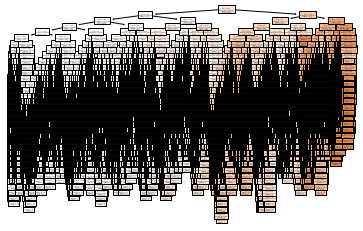

In [23]:
x=plot_tree(dtr,filled=True)
x

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rfr=RandomForestRegressor(max_depth=5)
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

In [26]:
y_pred=rfr.predict(x_test)

In [27]:
r2_score(y_test,y_pred)

0.9070212769553402

In [28]:
np.sqrt(mean_squared_error(y_test,y_pred))

1221.320758262119

In [29]:
#when performance of the model than desired, so we can go for different techniques to solve this issue
#1. feature engineering
#2. feature selection
#3. hyperparameter tuning
#4. optimization

#when performance of the model is overachieved, so we can do the following:
#1. regularisation
#2. cross validation

In [30]:
from sklearn.feature_selection import SelectKBest,chi2

In [31]:
s=SelectKBest(chi2,k=10).fit_transform(x_train,y_train)

In [32]:
s.shape

(48548, 10)